# Loading the ECCOv4 native model grid parameters 

## Objectives

Introduce two methods of loading the ECCOv4 native model grid parameters.

## Introduction

The ECCOv4 model grid parameters are provided as a single NetCDF file.  The file you have may look a little different than the one shown here because we have been working hard at improving how what exactly goes into our NetCDF files.  

This tutorial document is current as of Sep 2019 with the ECCOv4 NetCDF grid files provided in the following directories:

https://ecco.jpl.nasa.gov/drive/files/Version4/Release3_alt (po.daac drive, recommended)

https://web.corral.tacc.utexas.edu/OceanProjects/ECCO/ECCOv4/Release3_alt/  (mirror at U. Texas, Austin)

## Two methods to load the ECCOv4 model grid parameter NetCDF file 

Because the ECCOv4 model grid parameter data is provided in a single file you can use the ``open_dataset`` routine from ``xarray`` to open it. 

Alternatively, our subroutine ``load_ecco_grid_nc`` allows you to (optionally) specify a subset of vertical levels or a subset of tiles to load.

We'll show both methods.  Let's start with ``open_dataset``.

First set up your environment.

In [1]:
import numpy as np
import xarray as xr
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Import the ecco_v4_py library into Python
## =========================================

## -- If ecco_v4_py is not installed in your local Python library, 
##    tell Python where to find it.  For example, if your ecco_v4_py
##    files are in /Users/ifenty/ECCOv4-py/ecco_v4_py, then use:

sys.path.append('/Users/ifenty/ECCOv4-py')
import ecco_v4_py as ecco

In [3]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

## -- If files are on a local machine, use something like 
# base_dir = '/Users/ifenty/'
base_dir = '/Users/ifenty/ECCOv4-release/'

## define a high-level directory for ECCO fields
ECCO_dir = base_dir + '/Release3_alt/'

### Method 1: Loading the model grid parameters using ``load_ecco_grid_nc``

Method 2 is super simple, just use ``open_dataset``:

In [4]:
grid_dir = ECCO_dir + 'nctiles_grid/'

## load the grid
grid = xr.open_dataset(grid_dir + 'ECCOv4r3_grid.nc')
grid

<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 ...
    YC       (tile, j, i) float32 ...
    XG       (tile, j_g, i_g) float32 ...
    YG       (tile, j_g, i_g) float32 ...
    Zl       (k_l) float32 .

Let's plot two of the model grid parameter fields ``hFacC`` (tracer cell thickness factor) and ``rA`` (grid cell surface area)

First we plot ``hFac``:

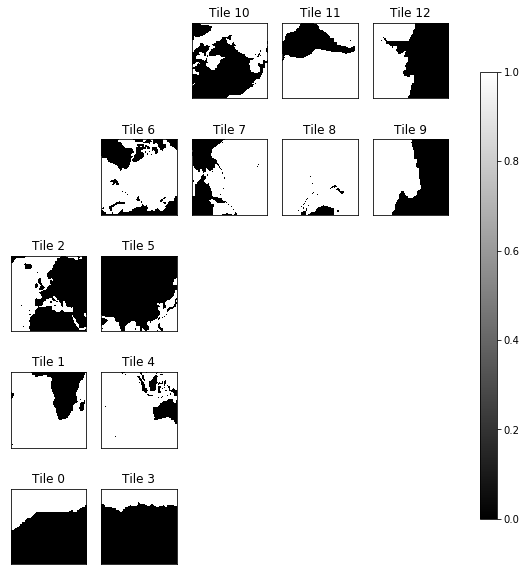

In [5]:
ecco.plot_tiles(grid.hFacC.sel(k=0), show_colorbar=True, cmap='gray');

'Model grid cell surface area [m^2]'

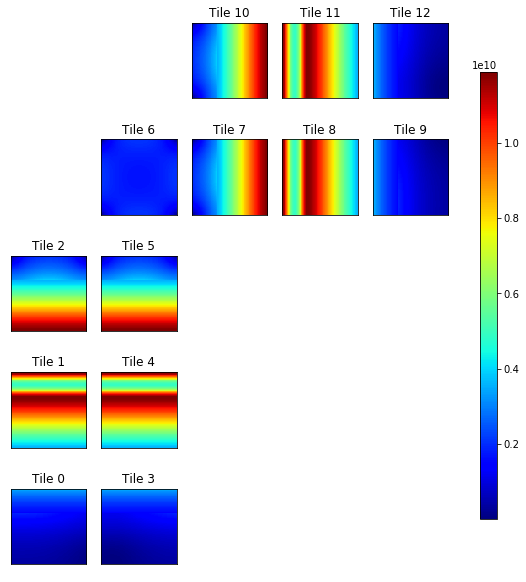

In [6]:
ecco.plot_tiles(grid.rA, show_colorbar=True);
'Model grid cell surface area [m^2]'

### Method 2: Loading the model grid parameters using ``load_ecco_grid_nc``

A more advanced routine, ``load_ecco_grid_nc``, allows you to load only a subset of tiles and vertical levels.  If no optional parameters are given, the entire grid object is loaded, just like ``open_dataset``

In [7]:
grid_dir = ECCO_dir + 'nctiles_grid'

grid = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc')
grid

<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 -111.60647 -111.303 ... -105.58465 -111.86579
    YC       (tile, j, i) float32 -88.24259 -88.382515 ... -88.07871 -88.10267
    XG       (tile, j_g, i_g)

Alternatively we can load just a subset of tiles and vertical levels.

In [8]:
grid_subset = ecco.load_ecco_grid_nc(grid_dir, 'ECCOv4r3_grid.nc', tiles_to_load = [1, 10, 12], k_subset=[0,1,2,3])
grid_subset

<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 90, j_g: 90, k: 4, k_l: 4, k_p1: 4, k_u: 4, tile: 3)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_l      (k_l) int64 0 1 2 3
  * tile     (tile) int64 1 10 12
    XC       (tile, j, i) float32 -37.5 -36.5 -35.5 ... -105.58465 -111.86579
    YC       (tile, j, i) float32 -56.73891 -56.73891 ... -88.07871 -88.10267
    XG       (tile, j_g, i_g) float32 -38.0 -37.0 ... -102.928925 -108.95171
    YG       (tile, j_g, i_g) float32 -57.005695 -57.005695 ... -88.02409
    Zl       (k_l) float32 0.0 -10.0 -20.0 -30.0
    Zu       (k_u) float32 -10.0 -20.0 -30.0 

notice that ``grid_subset`` only has 3 tiles (9,10, 11) and 4 depth levels (0, 1, 2, 3), as expected.

Let's plot ``hFacC`` and ``rA`` again

'Model grid cell surface area [m^2] in tiles 1, 10, and 12 '

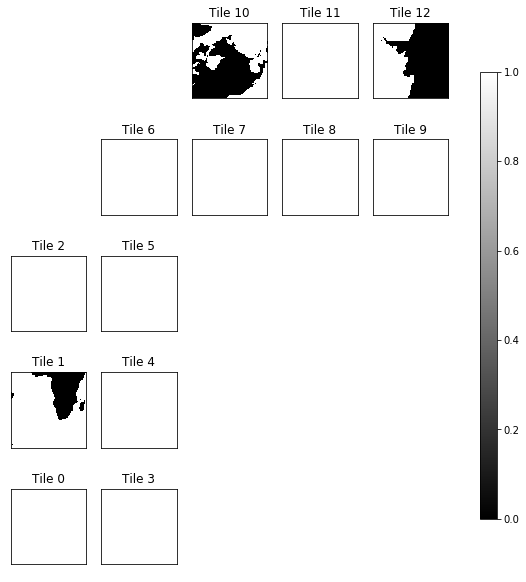

In [9]:
ecco.plot_tiles(grid_subset.hFacC.sel(k=0), show_colorbar=True, cmap='gray');
'Model grid cell surface area [m^2] in tiles 1, 10, and 12 '

Notice that 10 of the 13 tiles are blank because they were not loaded.

'Model grid cell surface area [m^2]'

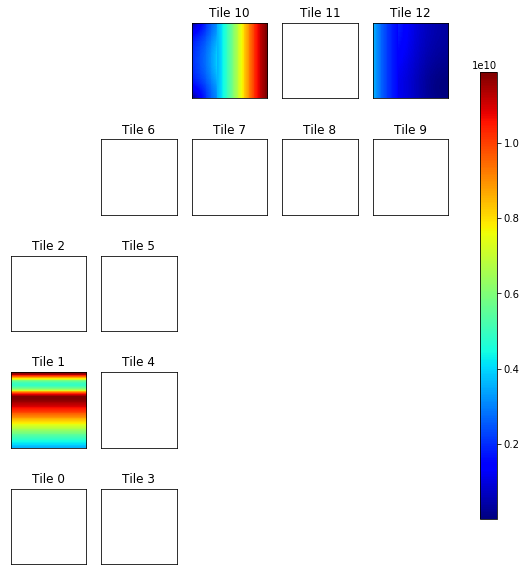

In [10]:
ecco.plot_tiles(grid_subset.rA, show_colorbar=True);
'Model grid cell surface area [m^2]'

## Summary

Now you know two ways to load the ECCOv4 grid parameter file!  